In [ ]:
import pandas as pd
import tsam.timeseriesaggregation as tsam
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(
    "../storage_investment/storage_investment.csv",
    index_col=["timestep"]
)
data.index = pd.date_range("2022-01-01", periods=8760, freq="30min")

typical_periods = 28
hours_per_period = 24

aggregation1 = tsam.TimeSeriesAggregation(
    timeSeries=data,
    noTypicalPeriods=typical_periods,
    hoursPerPeriod=hours_per_period,
    clusterMethod="k_medoids",
    sortValues=False,
    rescaleClusterPeriods=False,
    extremePeriodMethod="replace_cluster_center",
    # addPeakMax=["wind", "pv"],
    representationMethod="durationRepresentation",
)

_ = aggregation1.createTypicalPeriods()

In [25]:
data2 = aggregation1.predictOriginalData()

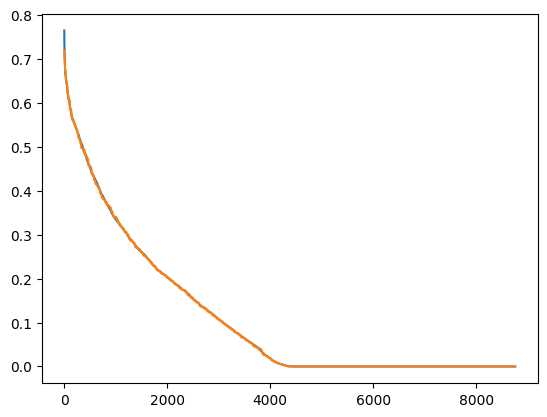

In [26]:
plt.plot(sorted(data["pv"])[::-1])
plt.plot(sorted(data2["pv"])[::-1])
plt.show()

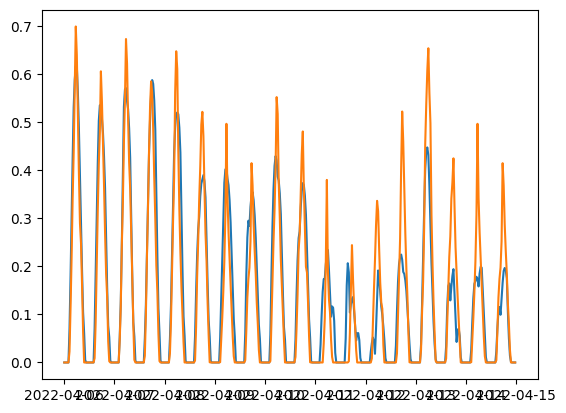

In [27]:
plt.plot(data["pv"]["2022-04-06":"2022-04-14"])
plt.plot(data2["pv"]["2022-04-06":"2022-04-14"])
plt.show()